>**Problem Statement:** An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

# With log transformation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [54]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [36]:
# df_train.Upvotes.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

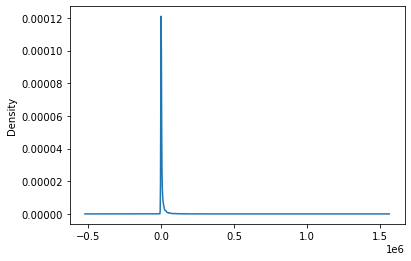

In [4]:
# independent variables
df_train.Reputation.plot(kind='kde')

In [37]:
df_train.columns

# it seems it has too many values out side the box

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

### Applying log transformation on skewed data

In [55]:
mm = MinMaxScaler()

In [56]:
df_train.Reputation = mm.fit_transform(df_train[['Reputation']])
df_test.Reputation = mm.transform(df_test[['Reputation']])

In [58]:
df_train.Views = mm.fit_transform(df_train[['Views']])
df_test.Views = mm.transform(df_test[['Views']])

In [59]:
df_train.Answers = mm.fit_transform(df_train[['Answers']])
df_test.Answers = mm.transform(df_test[['Answers']])

In [60]:
df_train.Reputation = np.log1p(df_train.Reputation)
df_test.Reputation = np.log1p(df_test.Reputation)

In [43]:
df_train.Answers = np.log1p(df_train.Answers)
df_test.Answers = np.log1p(df_test.Answers)

In [44]:
df_train.Views = np.log1p(df_train.Views)
df_test.Views = np.log1p(df_test.Views)

In [45]:
df_train.Upvotes = np.log1p(df_train.Upvotes)

### After transformation

<AxesSubplot:ylabel='Density'>

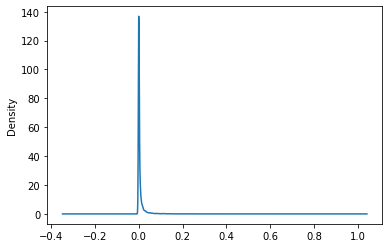

In [46]:
df_train.Reputation.plot(kind='kde')

In [47]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [48]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [49]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8461859775984625

In [52]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))

1520.5481866987216

In [53]:
df_pred = model.predict(df_test)
df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('logonall_rf_results.csv',index=False)

<AxesSubplot:ylabel='Density'>

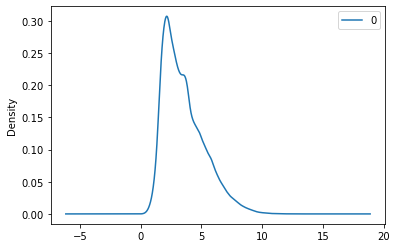

In [22]:
pd.DataFrame(model.predict(df_test)).plot(kind='kde')

In [23]:
X_train.describe()


,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
count,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000
mean,0.501157,0.325923,0.506102,0.219277,0.062412,0.097862,0.219103,0.043956,0.131971,0.037840,0.070577,0.021232
std,0.166177,0.130281,0.134944,0.413757,0.241903,0.297128,0.413639,0.204998,0.338459,0.190808,0.256118,0.144157
min,0.000000,0.000000,0.035694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407150,0.252915,0.422068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.513849,0.319143,0.516223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.616146,0.412486,0.599739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---------------------------------
## Trying normal without log transformation

In [5]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [6]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [7]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [8]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Lets try with randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV


model = XGBRegressor()

n_estimators = [100,600,1500]
max_depth = [2,9,15]
booster = ['gbtree']
learning_rate = [0.02,0.1,0.2]
min_child_weight = [1,3,6]
base_score = [0.2,0.6,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight':min_child_weight,
    'booster': booster,
    'base_score': base_score   
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 50,
                              scoring = 'neg_root_mean_squared_error',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 91.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 201.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 248.1min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [16]:
random_cv.best_estimator_

XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9093427142545055

In [18]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1179.6129539055562

In [19]:
df_pred = model.predict(df_test)
#df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('nothing_results.csv',index=False)

# RMSE
> ### without Log transformation - 1108.7560634485196
> ### with Log transformation - 1520.5029213619305